In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
from scipy import signal as sps
import seaborn as sns
import glob
import re

Using matplotlib backend: Qt4Agg


In [2]:
trials=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\Analysis\\Odor_Panel\\Habituation_Trials.csv')
# filerow=trials.loc[trials['File']==date]
# odortrials={}
# for t in trials.Odor.unique():
#     y={t:[int(x) for x in filerow.loc[filerow['Odor'] == t][['T1','T2','T3','T4']].values.tolist()[0]]}
#     odortrials.update(y)

In [4]:
fullpeak=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    mean=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\HabituationFiles\\{0}\\{1}_mean.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    mdf=pd.concat([mean['Odor'],mean[[col for col in mean.columns if ')_' in col]]],axis=1)
    temp=mdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullpeak=fullpeak.append(temp)
fullpeak=fullpeak.reset_index(drop=True)
# fullpeak.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\HabituationFiles\\fullpeak.csv',index=False)

In [5]:
#THIS ONE KEEPS THE CELL INDEX
fullpeak=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    mean=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\HabituationFiles\\{0}\\{1}_mean.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    mdf=pd.concat([mean['Odor'],mean[[col for col in mean.columns if ')_' in col]]],axis=1)
    temp=mdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullpeak=fullpeak.append(temp)
CLfullpeak=fullpeak.reset_index(drop=True)
# fullpeak.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\HabituationFiles\\fullpeak_WL.csv',index=False)

In [5]:
fullsuccess=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_success.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    sdf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=sdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullsuccess=fullsuccess.append(temp)
fullsuccess=fullsuccess.reset_index(drop=True)
# fullsuccess.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullsuccess.csv',index=False)

In [6]:
# WITH CELL LABELS
fullsuccess=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\HabituationFiles\\{0}\\{1}_success.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    sdf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=sdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullsuccess=fullsuccess.append(temp)
CLfullsuccess=fullsuccess.reset_index(drop=True)
fullsuccess.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\HabituationFiles\\fullsuccess_WI.csv',index=False)

In [ ]:
#Graph baseline

In [32]:
peakdf=fullpeak[['Group','Pre','Post5','Post30']]

In [33]:
peakmelt=pd.melt(peakdf,('Group'),var_name='time')

In [41]:
sns.factorplot(x='time',y='value',hue='Group',data=peakmelt);

In [46]:
sns.pointplot(x='time',y='value',data=peakmelt);

# Graph Successes

In [ ]:
one

In [85]:
df=fullsuccess.drop(['Mouse'],axis=1)
df=pd.melt(df,'Group',var_name='Odor')

one_df=df[['Group','Odor','value']][df.Odor.isin(['MS01','Hexanal01','IAA01','THA','AP','PA','Hexanone','EB'])]
conc_df=df[['Group','Odor','value']][df.Odor.isin(['MS01','MS05','MS10','Hexanal01','Hexanal05','Hexanal10','IAA01','IAA05','IAA10'])]
conc_df=conc_df.sort_values(by='Odor')

sorting=('MS01','THA','AP','PA','IAA','Hexanone','Hexanal01','EB')
one_df.Odor=one_df.Odor.astype('category')
one_df.Odor.cat.set_categories(sorting,inplace=True)
one_df=one_df.sort_values(['Odor'])

one_df=one_df.replace(to_replace='MS01',value='MS')
one_df=one_df.replace(to_replace='Hexanal01',value='Hexanal')
one_df=one_df.replace(to_replace='IAA01',value='IAA')

sorter=('MS01','MS05','MS10','IAA01','IAA05','IAA10','Hexanal01','Hexanal05','Hexanal10')
conc_df.Odor=conc_df.Odor.astype('category')
conc_df.Odor.cat.set_categories(sorter,inplace=True)
conc_df=conc_df.sort_values(['Odor'])

conc_df=conc_df.replace(to_replace='MS01',value='MS 1%')
conc_df=conc_df.replace(to_replace='MS05',value='MS 5%')
conc_df=conc_df.replace(to_replace='MS10',value='MS 10%')
conc_df=conc_df.replace(to_replace='IAA01',value='IAA 1%')
conc_df=conc_df.replace(to_replace='IAA05',value='IAA 5%')
conc_df=conc_df.replace(to_replace='IAA10',value='IAA 10%')
conc_df=conc_df.replace(to_replace='Hexanal01',value='Hexanal 1%')
conc_df=conc_df.replace(to_replace='Hexanal05',value='Hexanal 5%')
conc_df=conc_df.replace(to_replace='Hexanal10',value='Hexanal 10%')

In [87]:
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("poster", font_scale=1.3);
plt.figure(figsize=(17, 5));
ax = sns.pointplot(x="Odor", y="value", hue="Group", palette={"Control": "r", "Hexanal": "b", "Mint": "g"},
                 data=conc_df);
sns.despine()
plt.ylabel('Proportion of Responses');
plt.title('Responses above threshold');
plt.xlabel('Odor');
ax.legend_.remove()
plt.tight_layout()

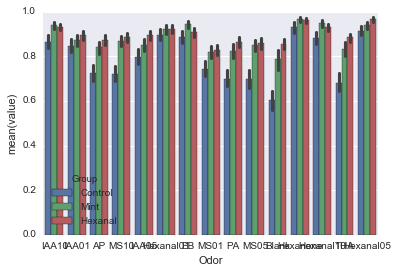

In [21]:
# plt.plot(df[df.Group=='Control']['IAA10']);
sns.barplot(x='Odor',y='value',hue='Group',data=df);

In [7]:
fullint=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_meanint.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullint=fullint.append(temp)
fullint=fullint.reset_index(drop=True)
# fullint.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullintegral.csv',index=False)

In [5]:
#WITH CELL LABELS
fullint=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_meanint.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullint=fullint.append(temp)
CLfullint=fullint.reset_index(drop=True)
# fullint.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullintegral_WL.csv',index=False)

In [9]:
#Full Baseline
fullbase=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_meanbase.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullbase=fullbase.append(temp)
fullbase=fullbase.reset_index(drop=True)
# fullbase.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullbaseline.csv',index=False)

In [6]:
# WITH CELL LABEL
#Full Baseline - Untrended
fullbase=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\Untrended_For_B\\{0}\\{1}_meanbase.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullbase=fullbase.append(temp)
CLfullbase=fullbase.reset_index(drop=True)
# fullbase.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullbaseline_WL.csv',index=False)

# Make dataframe with cell labels

In [8]:
melt_base=pd.melt(fullbase,('Mouse','Group'),var_name='Odor')
melt_int=pd.melt(CLfullint,('Mouse','Group'),var_name='Odor')
melt_success=pd.melt(CLfullsuccess,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(CLfullpeak,('Mouse','Group'),var_name='Odor')

NameError: name 'fullbase' is not defined

In [13]:
comparison=pd.concat([melt_int,melt_peak['value']],axis=1)
comparison.columns=['Mouse','Group','Odor','Integral','Peak']
comparison=comparison.dropna()
fullcomparison=pd.concat([comparison,pd.DataFrame(comparison.Peak/comparison.Integral.replace({ 0 : np.nan }))],axis=1)
fullcomparison.columns=['Mouse','Group','Odor','Integral','Peak','Peak_to_Integral']

In [14]:
from numpy import median
sns.set_context("talk", font_scale=2.2);
sns.pointplot('Odor','Peak_to_Integral',hue='Group',data=fullcomparison,estimator=median);
plt.ylim(-4,4);

(-4, 4)

In [16]:
#THE ENTIRE DATAFRAME
completedf=pd.concat([melt_base[['Mouse','Group','Odor','value']],melt_int['value'],melt_peak['value'],melt_success['value']],axis=1)
completedf.columns=['Mouse','Group','Odor','Baseline','Integral','Peak','Success']

In [53]:
#GRAPH THE INTERACTIONS
sns.set(palette="muted", color_codes=True);
sns.set_context("poster",font_scale=1.3);
sns.jointplot('Peak','Baseline',completedf,size=7);
plt.tight_layout()
sns.despine()
# plt.ylabel('Integral',fontsize=34);
# plt.title('Integral vs. Peak');
# plt.xlabel('Peak',fontsize=34);